In [12]:
import pandas as pd
wine = pd.read_csv("https://bit.ly/wine_csv_data")

In [13]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [14]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [15]:
#data랑 target으로 특성 나누기
data = wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()

In [17]:
#훈련세트랑 테스트 세트 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size =  0.2, random_state = 42)

In [18]:
#alcohol, sugar, pH의 스케일이 각자 다르기 때문에 전처리 과정 진행
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [19]:
#모델 생성하기(레드 와인인가 화이트 와인인가를 분류하는 이진 분류이므로 로지스틱 회귀 사용)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
lr.score(test_scaled, test_target)

0.7808350971714451


0.7776923076923077

In [20]:
#결과 설명이 어려움 -> 결정 트리 모델 사용(이유를 설명하기에 용이함)

In [21]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


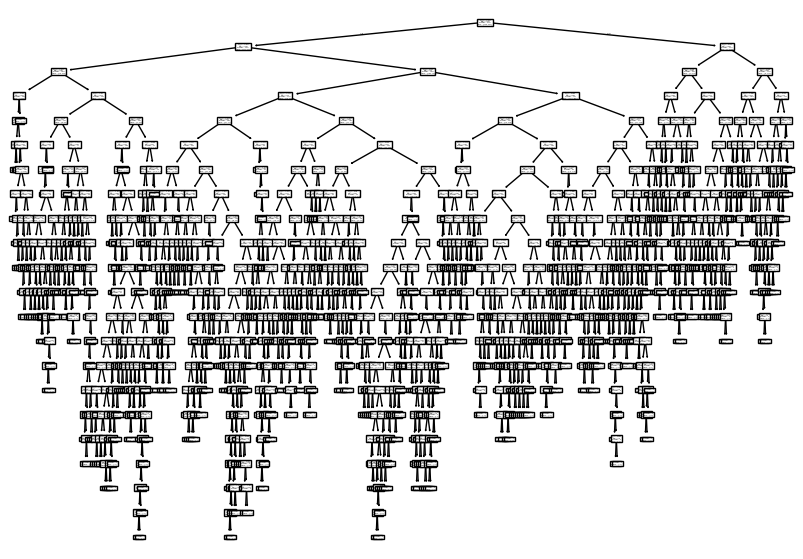

In [27]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

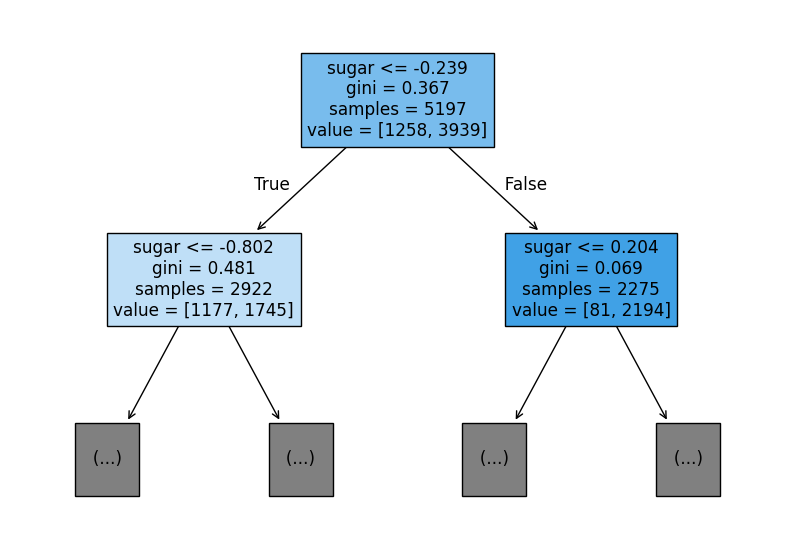

In [30]:
#너무 복잡하므로 max_depth 매개변수를 조절한다
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

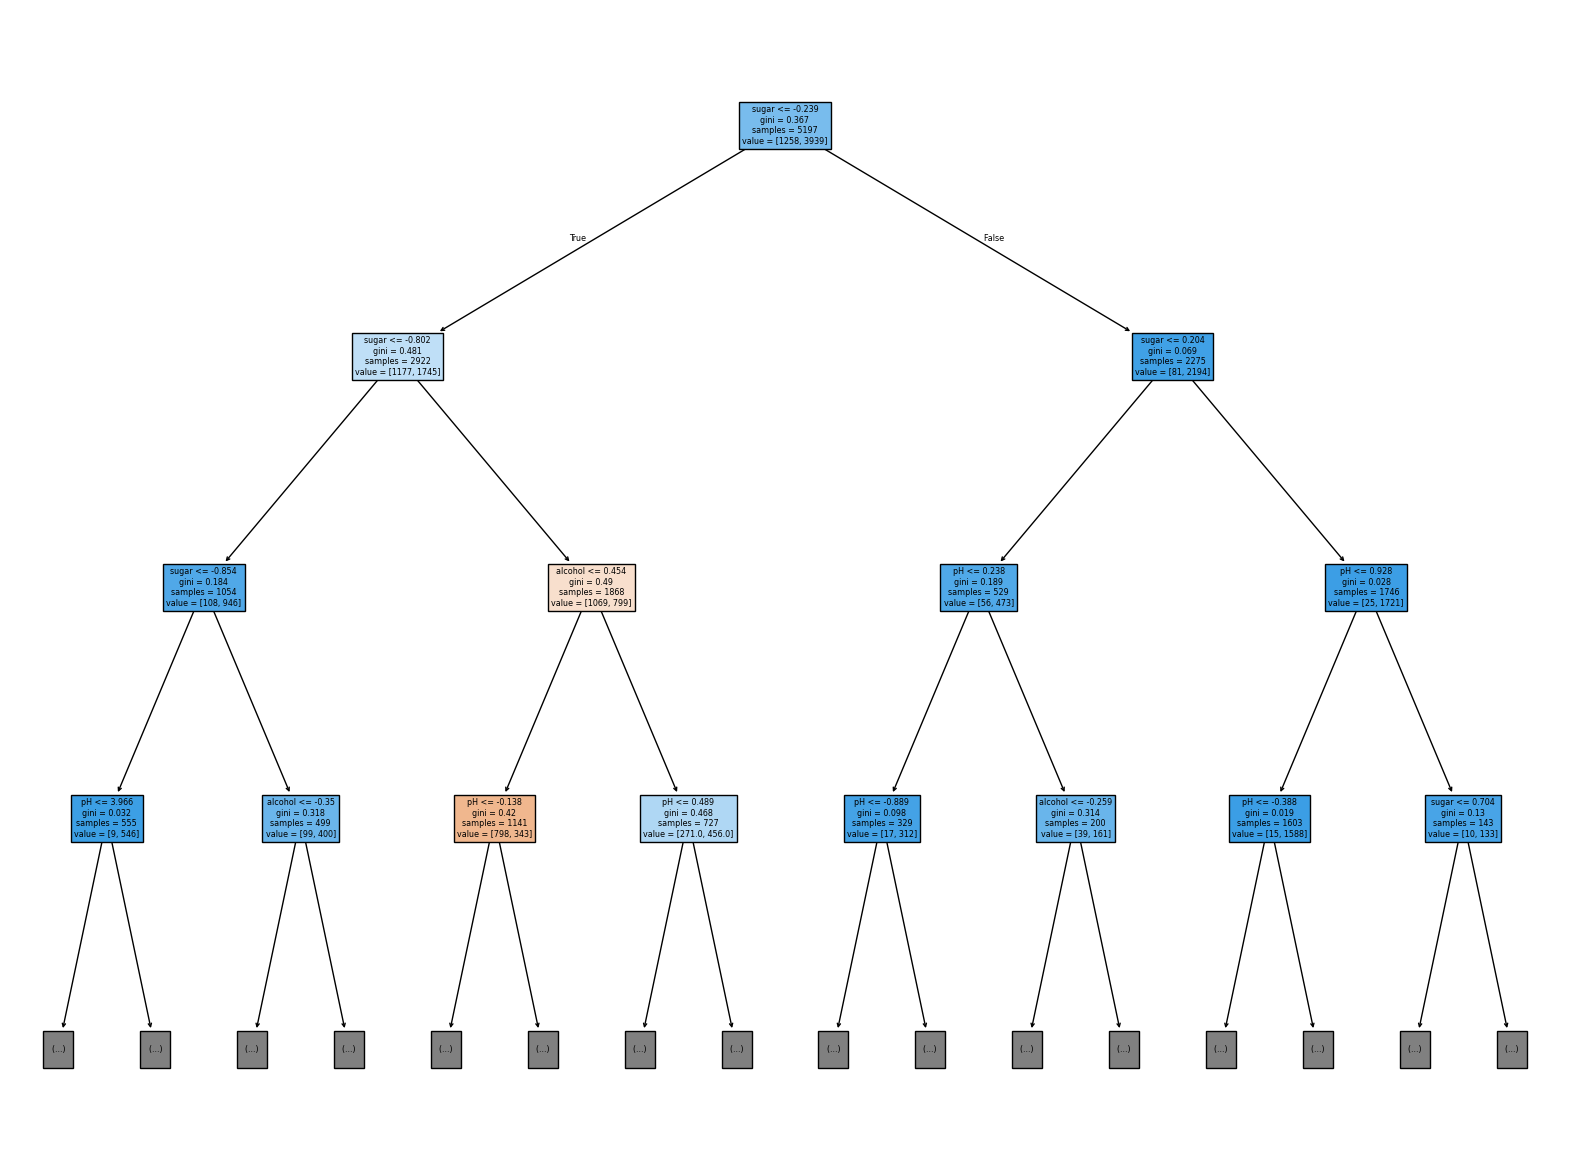

In [32]:
plt.figure(figsize=(20,15))
plot_tree(dt, max_depth=3, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

In [33]:
#리프노드(최종노드)에서 왼쪽에서 3번째만 레드와인으로 분류된다 -> 즉 레드와인이 되려면 저 노드에 도착해야 한다.
#저 노드에 도착하기 위한 조건을 설명해보면 당도는 -0.239보다 작고 -0.802보다 커야하면 알코올 도수는 0.454보다 작아야한다

#샘플을 나누는 기준은 불순도이다. 그리고 불순도를 계산할 때는 클래스별 비율을 가지고 계산했다 -> 즉 샘플을 나누는 기준에 특성값의 스케일이 아무런 영향을 미치지 않으므로 굳이 데이터를 전처리한 값을 사용하지 않아도 된다

In [34]:
#데이터를 전처리 하지 않은 값으로 모델을 다시 훈련하고 성능을 확인하기
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))


0.8454877814123533
0.8415384615384616


In [35]:
#계산 결과를 보면 전처리를 한 데이터로 모델을 훈련했을 때와 완전히 같은 점수가 나온다 -> 굳이 전처리한 데이터 값을 사용할 필요가 없음을 증명했다

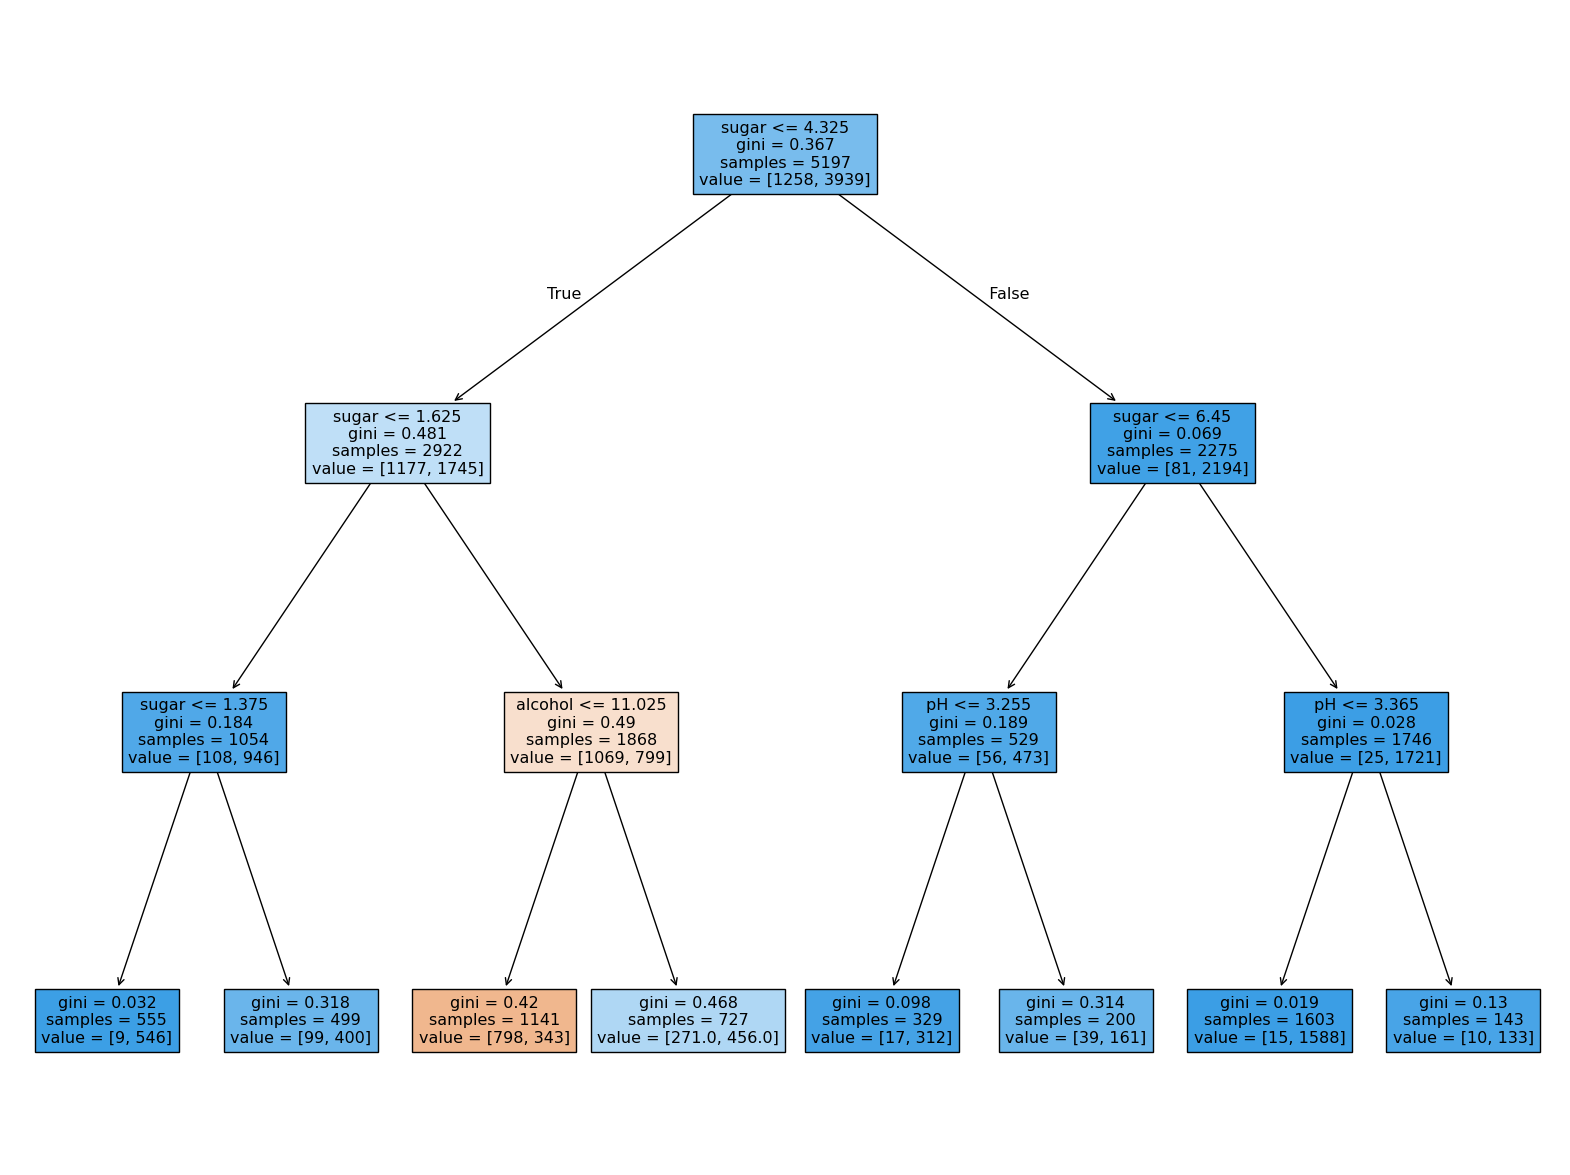

In [37]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [38]:
#데이터를 전처리하지 않은 기본 값으로 트리를 그려보면 더 쉽게 해석할 수 있다.
#당도가 1.625보다 크고 4.325보다 작으며 알코올 도수가 11.025와 같거나 작은 것이 레드와인이고 나머지는 화이트 와인임을 알 수 있다.

In [39]:
#가장 유용한 특성을 찾을 때 사용하는 메소드
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]
